# 다중 선형 회귀

보스턴 주택 가격에 영향을 미치는 요인들을 확인하기 (선형 회귀 모델 추정)

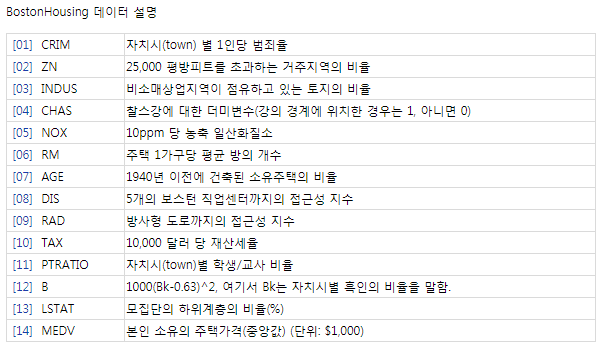
[표 출처](http://dator.co.kr/?vid=ctg258&mid=textyle&document_srl=1721307)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
boston = load_boston()
boston_data = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_target = pd.DataFrame(boston.target, columns=['Target'])
boston = pd.concat([boston_data, boston_target], axis=1)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
X_train, X_test, y_train, y_test = train_test_split(boston_data, boston_target, train_size=0.8, test_size=0.2)

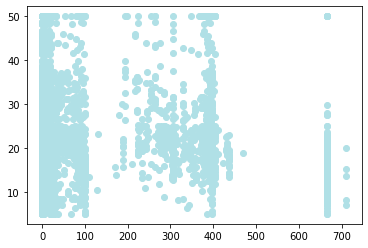

In [4]:
plt.plot(boston_data, boston_target, 'o', color='powderblue')
plt.show()

<AxesSubplot:>

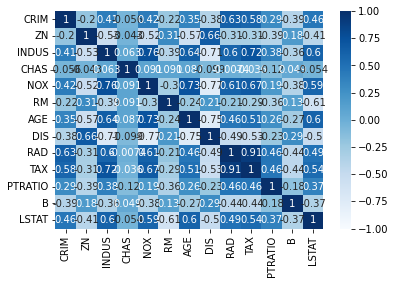

In [5]:
sns.heatmap(boston_data.corr(), cmap='Blues', annot=True, vmin=-1, vmax=1)

<br>
<br>

## 1. 회귀 모델 생성

보스턴 주택 가격에 영향을 미치는 요인과 target (보스턴 주택 가격) 간의 선형 회귀 모델 추정

X는 2차원의 array 형태여야 하기 때문에 다음 중 하나의 방법으로 변환해준다
- data.reshape(-1, 1): 상수항 미포함
- sm.add_constant(data, has_constant='add'): 상수함 포함

<br>

### 1-1. sm.OLS 사용

최소제곱법 OLS로 선형 회귀 모델을 생성한다

In [6]:
X_data = sm.add_constant(X_train, has_constant='add')
X_data.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
401,1.0,14.23620,0.0,18.10,0.0,0.693,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32
248,1.0,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7.0,330.0,19.1,374.71,9.52
209,1.0,0.43571,0.0,10.59,1.0,0.489,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09
80,1.0,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
348,1.0,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99


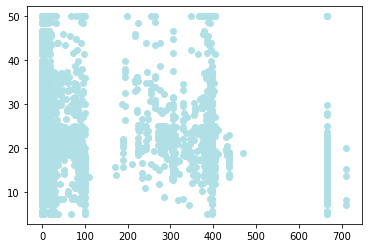

In [7]:
plt.plot(X_train, y_train, 'o', color='powderblue')
plt.show()

<br>

**회귀모형의 유의성**

- F-statistic : 검정통계량 = 81.49
- Prob (F-statistic) : P-value = 1.80e-102 < 0.05

▶ 회귀모형은 통계적으로 유의하다고 볼 수 있다.

<br>

**변수들의 유의성**

- INDUS의 P-value = 0.944 > 0.05 
- AGE의 P-value = 0.267 > 0.05 

▶ INDUS와 AGE 변수를 제외한 나머지 독립변수들은 종속변수인 주택 가격에 유의한 영향을 준다고 볼 수 있다.

<br>

**회귀모형의 설명력**

- R-squared = 0.0731
- Adj. R-squared = 0.722

▶ 회귀모형이 종속변수의 변동을 약 72.2% 정도 설명하고 있다.

In [26]:
model = sm.OLS(y_train, X_data)
model_fit1 = model.fit()
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     94.63
Date:                Fri, 17 Sep 2021   Prob (F-statistic):          8.14e-112
Time:                        04:20:04   Log-Likelihood:                -1176.1
No. Observations:                 404   AIC:                             2380.
Df Residuals:                     390   BIC:                             2436.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.0034      5.662      6.535      0.000      25.871      48.136
CRIM          -0.1145      0.033     -3.459      0.001      -0.180      -0.049
ZN             0.0489      0.015      3.280      0.001       0.020       0.078
INDUS          0.0048      0.064      0.075      0.941      -0.120       0.130
CHAS           2.8478      0.893      3.191      0.002       1.093       4.603
NOX          -18.5956      4.170     -4.459      0.000     -26.795     -10.397
RM             3.7586      0.472      7.964      0.000       2.831       4.686
AGE         6.589e-05      0.014      0.005      0.996      -0.028       0.028
DIS           -1.4841      0.215     -6.908      0.000      -1.907      -1.062
RAD            0.2726      0.069      3.923      0.000       0.136       0.409
TAX           -0.0104      0.004     -2.697      0.007      -0.018      -0.003
PTRATIO       -0.9797      0.140     -7.013      0.000      -1.254      -0.705
B              0.0098      0.003      3.504      0.001       0.004       0.015
LSTAT         -0.5141      0.055     -9.369      0.000      -0.622      -0.406
==============================================================================
Omnibus:                      147.337   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.082
Skew:                           1.508   Prob(JB):                    6.42e-155
Kurtosis:                       8.752   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

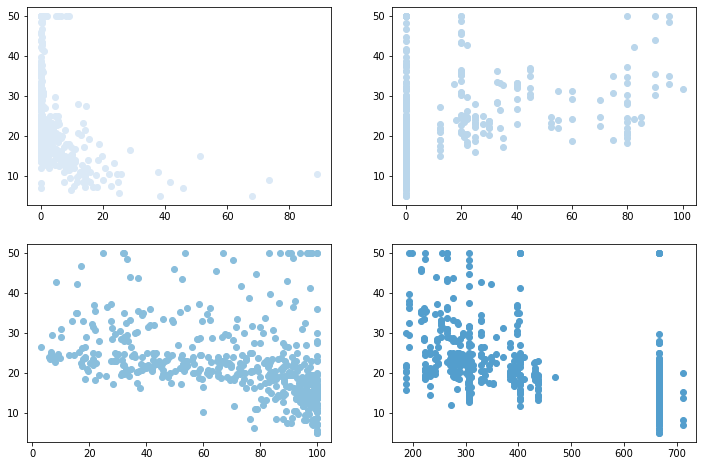

In [27]:
plt.rcParams['figure.figsize'] = (12, 8)
colors = sns.color_palette("Blues")

plt.subplot(221)
plt.plot(boston_data['CRIM'], boston_target, 'o', color=colors[0])

plt.subplot(222)
plt.plot(boston_data['ZN'], boston_target, 'o', color=colors[1])

plt.subplot(223)
plt.plot(boston_data['AGE'], boston_target, 'o', color=colors[2])

plt.subplot(224)
plt.plot(boston_data['TAX'], boston_target, 'o', color=colors[3])

plt.show()

<br>

**회귀계수** 

In [10]:
model_fit1.params

const      37.003356
CRIM       -0.114455
ZN          0.048861
INDUS       0.004755
CHAS        2.847832
NOX       -18.595645
RM          3.758579
AGE         0.000066
DIS        -1.484139
RAD         0.272633
TAX        -0.010388
PTRATIO    -0.979673
B           0.009847
LSTAT      -0.514063
dtype: float64

<br>

### 1-2. sklearn 사용

In [11]:
model = LinearRegression()
model_fit2 = model.fit(X_train, y_train)

<br>

**회귀계수** 

In [12]:
model_fit2.coef_

array([[-1.14455151e-01,  4.88611353e-02,  4.75544876e-03,
         2.84783170e+00, -1.85956447e+01,  3.75857929e+00,
         6.58898910e-05, -1.48413870e+00,  2.72633186e-01,
        -1.03882830e-02, -9.79673053e-01,  9.84715390e-03,
        -5.14062891e-01]])

In [13]:
model_fit2.intercept_

array([37.00335565])

<br>
<br>

## 2. 예측

PTRATIO (학생/교사 비율)과 target (보스턴 주택 가격) 간의 선형 회귀 모델을 사용해 보스턴 주택 가격 예측하기보스턴 주택 가격

In [14]:
def perform_eval(y_true, y_pred):
    print('explained_variance_score: {}'.format(explained_variance_score(y_true, y_pred)))
    print('mean_squared_errors: {}'.format(mean_squared_error(y_true, y_pred)))
    print('r2_score: {}'.format(r2_score(y_true, y_pred)))

<br>

### 2-1. sm.OLS 사용

In [15]:
pred_train1 = model_fit1.predict(X_data)

In [16]:
np.dot(X_data, model_fit1.params)[:10]

array([17.38209755, 21.20368558, 17.1294901 , 28.33890558, 27.68523997,
       35.13997946, 36.97400837, 34.82881982, 11.69040119, 25.06239501])

In [17]:
sum((y_train['Target'] - pred_train1)**2) / (len(y_train))

19.777407889826577

In [18]:
X_test_data = sm.add_constant(X_test, has_constant='add')
pred_test1 = model_fit1.predict(X_test_data)
sum((y_test['Target'] - pred_test1)**2) / (len(y_test))

30.729746090010195

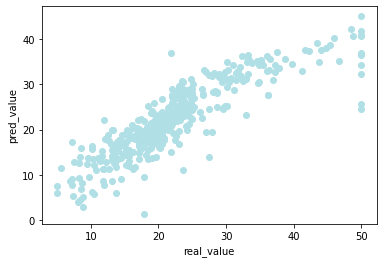

In [31]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(y_train, pred_train1, 'o', color='powderblue')
plt.xlabel('real_value')
plt.ylabel('pred_value')
plt.show()

In [20]:
perform_eval(y_test, pred_test1)

explained_variance_score: 0.6743062564991275
mean_squared_errors: 30.729746090010188
r2_score: 0.666649892073611


<br>

### 2-2. sklearn 사용

In [21]:
pred_train2 = model_fit2.predict(X_train)
pred_train2[:5]

array([[17.38209755],
       [21.20368558],
       [17.1294901 ],
       [28.33890558],
       [27.68523997]])

In [22]:
model_fit2.score(X_train, y_train)

0.7592966171485565

In [23]:
pred_test2 = model_fit2.predict(X_test)
pred_test2[:5]

array([[29.76724   ],
       [19.06548175],
       [29.73019566],
       [23.42344464],
       [25.03275135]])

In [24]:
model_fit2.score(X_test, y_test)

0.6666498920736101

In [25]:
perform_eval(y_test, pred_test2)

explained_variance_score: 0.6743062564991268
mean_squared_errors: 30.729746090010277
r2_score: 0.6666498920736101


<br>

---

<br>

## 결론

단순선형회귀에 비해 MSE는 낮아졌고 R2는 높아진 결과를 확인할 수 있다. 

- 회귀모형은 통계적으로 유의하다고 볼 수 있다.

- INDUS와 AGE 변수를 제외한 나머지 독립변수들은 종속변수인 주택 가격에 유의한 영향을 준다고 볼 수 있다.

- 회귀모형이 종속변수의 변동을 약 72.2% 정도 설명하고 있다.